<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Project 3:</b></u> Subeddit suitability moderation between r/Discworld r/Cosmere subreddits using NLP classification modelling

--- 
### Part 2: Clean hot posts from r/Discworld and r/Cosmere
---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from matplotlib_venn import venn2
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped posts
posts=pd.read_csv('../Data/posts.csv') 

In [3]:
posts

,title,post_text,is_text,is_media,flair_text,is_spoiler,score,upvote_ratio,total_comments,total_awards,author,id,post_url,subreddit
0,GNU Terry Pratchett,>In the Ramtop village where they dance the re...,True,False,GNU,False,854,0.99,129,7,Faithful_jewel,ukigit,https://www.reddit.com/r/discworld/comments/uk...,discworld
1,"Sub Updates for 2023, including Mod Recruiting...",Greetings everyone! The Mod Team at r/Discworl...,True,False,Mod Announcement,False,30,0.96,15,0,Faithful_jewel,10mjmpn,https://www.reddit.com/r/discworld/comments/10...,discworld
2,This feels like something Death and many other...,NaN,False,True,Memes/Humour,False,166,0.96,3,0,Panda-Sandwich,11pxjvp,https://i.redd.it/e013vqitoena1.jpg,discworld
3,"GNU Sir Terry, and thank you.",NaN,False,True,RoundWorld,False,480,0.99,7,0,gordielaboom,11plpi2,https://i.redd.it/3hrm44c2scna1.jpg,discworld
4,In honor of Sir Terry Pratchett my family and ...,NaN,False,False,RoundWorld,False,136,0.94,15,0,Sorellin-Grimm,11pu17r,https://www.reddit.com/gallery/11pu17r,discworld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,Way of Kings as a gift,I'm thinking about gifting my father a signed ...,True,False,No Spoilers,False,4,0.75,2,0,HauntingGold,10evvrr,https://www.reddit.com/r/Cosmere/comments/10ev...,Cosmere
1992,Literary Analysis for SP1,I created a short literary analysis on Tress a...,True,False,Tress (SP1),True,3,0.67,0,0,Ok-Consequence-8106,10evdo8,https://www.reddit.com/r/Cosmere/comments/10ev...,Cosmere
1993,Lord Ruler-God Theory,I do not want any spoilers for Mistborn. I am ...,True,False,Stormlight / early Mistborn: Final Empire,True,0,0.46,34,0,Any_Drag3177,10f764r,https://www.reddit.com/r/Cosmere/comments/10f7...,Cosmere
1994,do you invent or discover Awakening Commands?,like with maths,True,False,Warbreaker,False,28,0.98,26,0,spaghetto_guy,10eedye,https://www.reddit.com/r/Cosmere/comments/10ee...,Cosmere


In [4]:
# simple text cleaning
posts['post_text'] = posts['post_text'].fillna("")
posts.insert(0, 'titletext', posts ['title'] + ' ' + posts['post_text'])
posts=posts.drop(columns=['title','post_text']).copy(deep=True)

col_list=['titletext','flair_text']
for col in col_list:
    posts[col]=posts[col].map(lambda x: x.lower().strip())
posts.insert(1, 'word_count', [len(x.split()) for x in posts['titletext'].tolist()])

In [5]:
posts

,titletext,word_count,is_text,is_media,flair_text,is_spoiler,score,upvote_ratio,total_comments,total_awards,author,id,post_url,subreddit
0,gnu terry pratchett >in the ramtop village whe...,117,True,False,gnu,False,854,0.99,129,7,Faithful_jewel,ukigit,https://www.reddit.com/r/discworld/comments/uk...,discworld
1,"sub updates for 2023, including mod recruiting...",522,True,False,mod announcement,False,30,0.96,15,0,Faithful_jewel,10mjmpn,https://www.reddit.com/r/discworld/comments/10...,discworld
2,this feels like something death and many other...,10,False,True,memes/humour,False,166,0.96,3,0,Panda-Sandwich,11pxjvp,https://i.redd.it/e013vqitoena1.jpg,discworld
3,"gnu sir terry, and thank you.",6,False,True,roundworld,False,480,0.99,7,0,gordielaboom,11plpi2,https://i.redd.it/3hrm44c2scna1.jpg,discworld
4,in honor of sir terry pratchett my family and ...,15,False,False,roundworld,False,136,0.94,15,0,Sorellin-Grimm,11pu17r,https://www.reddit.com/gallery/11pu17r,discworld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,way of kings as a gift i'm thinking about gift...,280,True,False,no spoilers,False,4,0.75,2,0,HauntingGold,10evvrr,https://www.reddit.com/r/Cosmere/comments/10ev...,Cosmere
1992,literary analysis for sp1 i created a short li...,1900,True,False,tress (sp1),True,3,0.67,0,0,Ok-Consequence-8106,10evdo8,https://www.reddit.com/r/Cosmere/comments/10ev...,Cosmere
1993,lord ruler-god theory i do not want any spoile...,89,True,False,stormlight / early mistborn: final empire,True,0,0.46,34,0,Any_Drag3177,10f764r,https://www.reddit.com/r/Cosmere/comments/10f7...,Cosmere
1994,do you invent or discover awakening commands? ...,10,True,False,warbreaker,False,28,0.98,26,0,spaghetto_guy,10eedye,https://www.reddit.com/r/Cosmere/comments/10ee...,Cosmere


In [6]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,titletext,object,1996,1988,0,0.00
1,word_count,int64,1996,346,0,0.00
2,is_text,bool,1996,2,0,0.00
3,is_media,bool,1996,2,0,0.00
4,flair_text,object,1996,153,0,0.00
5,is_spoiler,bool,1996,2,0,0.00
6,score,int64,1996,440,0,0.00
7,upvote_ratio,float64,1996,73,0,0.00
8,total_comments,int64,1996,137,0,0.00
9,total_awards,int64,1996,7,0,0.00


In [7]:
#investigate missing author observations
posts[posts['author'].isnull()]

,titletext,word_count,is_text,is_media,flair_text,is_spoiler,score,upvote_ratio,total_comments,total_awards,author,id,post_url,subreddit
657,when blurb goes bad… guess the book from the b...,56,True,False,question,False,2,0.67,4,0,NaN,10umbqt,https://www.reddit.com/r/discworld/comments/10...,discworld
990,"goodbye never thought id write an ""im leaving ...",111,True,False,om,False,510,0.94,41,0,NaN,10awgt7,https://www.reddit.com/r/discworld/comments/10...,discworld
1284,brandons stance against audible. with the stan...,72,True,False,no spoilers,False,6,0.75,6,0,NaN,11aaqks,https://www.reddit.com/r/Cosmere/comments/11aa...,Cosmere
1378,question about _____________ [fairly heavy tlm...,138,True,False,tlm chapter 49,True,6,0.75,6,0,NaN,116m3yl,https://www.reddit.com/r/Cosmere/comments/116m...,Cosmere
1981,does the lost metal establish a temporal relat...,136,True,False,mixed,True,6,0.72,13,0,NaN,10f15ff,https://www.reddit.com/r/Cosmere/comments/10f1...,Cosmere


In [8]:
# checking reddit missing 'author' observations are those that have deleted their account, 
# posts details are still relevant for analysis
# author field is not critical

In [9]:
# OHE of booleans to 1/0
col_list=['is_text','is_media','is_spoiler']

for col in col_list:
    posts[col]=posts[col].replace({True: 1, False: 0})

In [10]:
posts['is_discworld']=posts['subreddit'].replace({'discworld': 1, 'Cosmere': 0})
posts=posts.drop(columns='subreddit').drop_duplicates().copy(deep=True)

--- 
### Part 3.1: Exploratory Data Anlysis of posts from r/Discworld and r/Cosmere - discrete variables
---

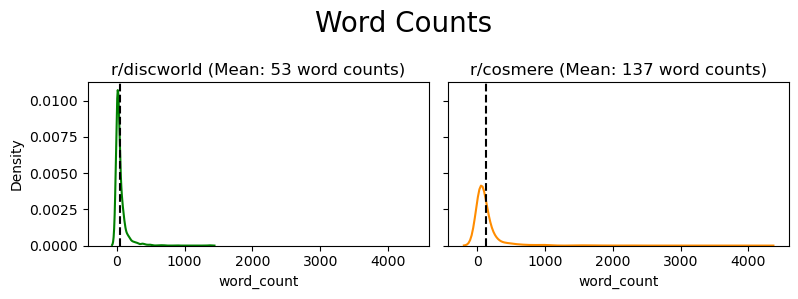

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True, sharex=True)
ax = ax.ravel()

g1 = sns.kdeplot(data=posts[posts['is_discworld']==1], x='word_count', ax = ax[0], color='green')
mean_1 = posts[posts['is_discworld']==1]['word_count'].mean()
g1.set_title(f'r/discworld (Mean: {round(mean_1)} word counts)')
ax[0].axvline(mean_1, ls='--', color='black')

g2 = sns.kdeplot(data=posts[posts['is_discworld']==0], x='word_count', ax = ax[1], color='darkorange')
mean_2 = posts[posts['is_discworld']==0]['word_count'].mean()
g2.set_title(f'r/cosmere (Mean: {round(mean_2)} word counts)')
ax[1].axvline(mean_2, ls='--', color='black')

plt.suptitle('Word Counts', fontsize=20)
plt.tight_layout()

In [12]:
posts.groupby('is_discworld').agg({'word_count': ['mean', 'max']})

word_count      
                    mean   max
is_discworld                  
0             136.999000  4172
1              53.451807  1369

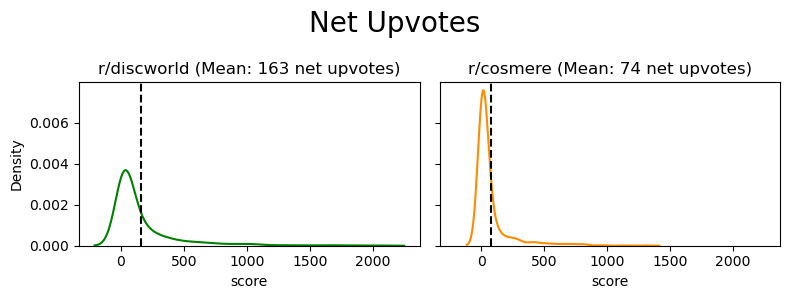

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True, sharex=True)
ax = ax.ravel()

g1 = sns.kdeplot(data=posts[posts['is_discworld']==1], x='score', ax = ax[0], color='green')
mean_1 = posts[posts['is_discworld']==1]['score'].mean()
g1.set_title(f'r/discworld (Mean: {round(mean_1)} net upvotes)')
ax[0].axvline(mean_1, ls='--', color='black')

g2 = sns.kdeplot(data=posts[posts['is_discworld']==0], x='score', ax = ax[1], color='darkorange')
mean_2 = posts[posts['is_discworld']==0]['score'].mean()
g2.set_title(f'r/cosmere (Mean: {round(mean_2)} net upvotes)')
ax[1].axvline(mean_2, ls='--', color='black')

plt.suptitle('Net Upvotes', fontsize=20)
plt.tight_layout()

In [14]:
posts.groupby('is_discworld').agg({'score': ['mean', 'max']})

score      
                    mean   max
is_discworld                  
0              73.951000  1300
1             163.420683  2040

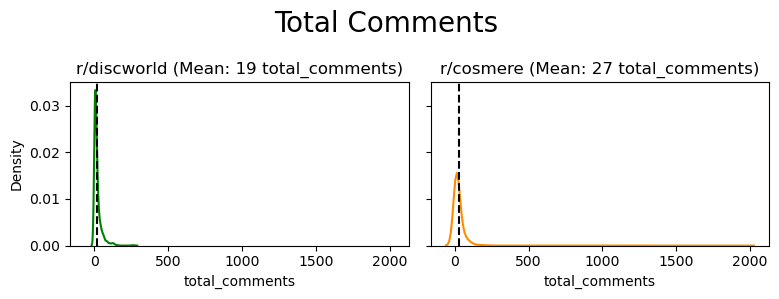

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True, sharex=True)
ax = ax.ravel()

g1 = sns.kdeplot(data=posts[posts['is_discworld']==1], x='total_comments', ax = ax[0], color='green')
mean_1 = posts[posts['is_discworld']==1]['total_comments'].mean()
g1.set_title(f'r/discworld (Mean: {round(mean_1)} total_comments)')
ax[0].axvline(mean_1, ls='--', color='black')

g2 = sns.kdeplot(data=posts[posts['is_discworld']==0], x='total_comments', ax = ax[1], color='darkorange')
mean_2 = posts[posts['is_discworld']==0]['total_comments'].mean()
g2.set_title(f'r/cosmere (Mean: {round(mean_2)} total_comments)')
ax[1].axvline(mean_2, ls='--', color='black')

plt.suptitle('Total Comments', fontsize=20)
plt.tight_layout()

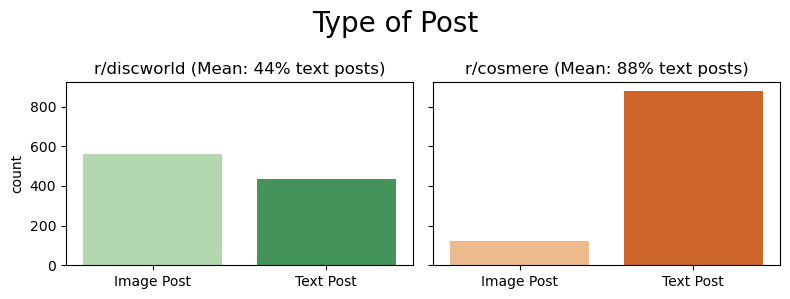

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True)
ax = ax.ravel()

g1 = sns.countplot(data=posts[posts['is_discworld']==1], 
                   x=posts[posts['is_discworld']==1]['is_text'].astype(int),
                   ax = ax[0], palette='Greens')
pct_1=posts[posts['is_discworld']==1]['is_text'].sum()/len(posts[posts['is_discworld']==1]['is_text'])
g1.set_xticklabels(['Image Post', 'Text Post'])
g1.set_title(f'r/discworld (Mean: {round(pct_1*100)}% text posts)')
g1.set_xlabel('')


g2 = sns.countplot(data=posts[posts['is_discworld']==0], 
                   x=posts[posts['is_discworld']==0]['is_text'].astype(int), 
                   ax = ax[1], palette='Oranges')
pct_2=posts[posts['is_discworld']==0]['is_text'].sum()/len(posts[posts['is_discworld']==0]['is_text'])
g2.set_xticklabels(['Image Post', 'Text Post'])
g2.set_title(f'r/cosmere (Mean: {round(pct_2*100)}% text posts)')
g2.set_ylabel('')
g2.set_xlabel('')

plt.suptitle('Type of Post', fontsize=20)
plt.tight_layout()

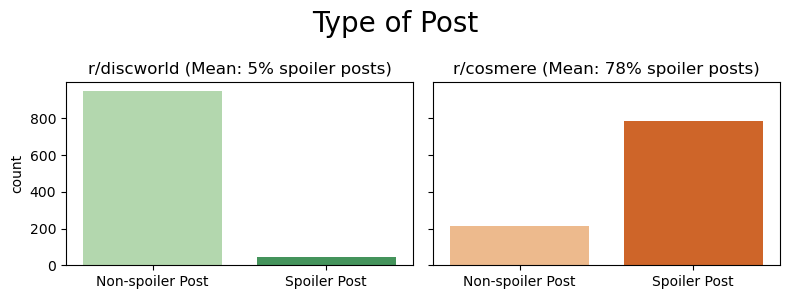

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True)
ax = ax.ravel()

g1 = sns.countplot(data=posts[posts['is_discworld']==1], 
                   x=posts[posts['is_discworld']==1]['is_spoiler'].astype(int),
                   ax = ax[0], palette='Greens')
pct_1=posts[posts['is_discworld']==1]['is_spoiler'].sum()/len(posts[posts['is_discworld']==1]['is_spoiler'])
g1.set_xticklabels(['Non-spoiler Post', 'Spoiler Post'])
g1.set_title(f'r/discworld (Mean: {round(pct_1*100)}% spoiler posts)')
g1.set_xlabel('')

g2 = sns.countplot(data=posts[posts['is_discworld']==0], 
                   x=posts[posts['is_discworld']==0]['is_spoiler'].astype(int), 
                   ax = ax[1], palette='Oranges')
pct_2=posts[posts['is_discworld']==0]['is_spoiler'].sum()/len(posts[posts['is_discworld']==0]['is_spoiler'])
g2.set_xticklabels(['Non-spoiler Post', 'Spoiler Post'])
g2.set_title(f'r/cosmere (Mean: {round(pct_2*100)}% spoiler posts)')
g2.set_ylabel('')
g2.set_xlabel('')

plt.suptitle('Type of Post', fontsize=20)
plt.tight_layout()

Comparing 'Hot' or popular posts from r/discworld and r/cosmere:
<br>
| submission reception| r/discworld                    | r/cosmere                     |
| :------------------ | :----------------------------: | :---------------------------: |
| word_count          | 53                             | <font color='green'>137</font>|
| is_text             | 44%                            | <font color='green'>88%</font>|
| is_media            | <font color='green'>39%</font> | 8%                            |
| is_spoiler          | 5%                             | <font color='green'>78%</font>|
| score               | <font color='green'>163</font> | 72                            |
| upvote_ratio        | <font color='green'>92%</font> | 83%                           |
| total_comments      | 19                             | <font color='green'>27</font> |
| total_awards        | <font color='green'>0.05</font>| 0.00                          |

r/cosmere appears to have more content and interactions: with a larger post average word count of 137 vs 53 and more average comments of 27 vs 19. However, it's worth noting that r/cosmere has 111K members while r/discworld only has 79.4K members, which may explain the greater interaction. r/cosmere posts also have a greater probability to have 'spoiler' tags at 78% vs 5%, or to be a text only post at 88% vs 44%. This is likely due to the cosmere series still being ongoing.

r/discword appears to be more rewarding with higher average net score of 163 vs 72, more upvote ration of 92% vs 83%, as well as more awards given. This seems to indicate a more friendly community. r/discworld posts also have a greater probability of being a media only post at 39% vs 8%.

--- 
### Part 3.2: Exploratory Data Anlysis of posts from r/Discworld and r/Cosmere - text variables
---

In [18]:
%%time
# Proprocess title_text
posts['title_text']=posts['titletext'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

CPU times: user 8min 13s, sys: 13 s, total: 8min 26s
Wall time: 8min 26s


In [19]:
posts

,titletext,word_count,is_text,is_media,flair_text,is_spoiler,score,upvote_ratio,total_comments,total_awards,author,id,post_url,is_discworld,title_text
0,gnu terry pratchett >in the ramtop village whe...,117,1,0,gnu,0,854,0.99,129,7,Faithful_jewel,ukigit,https://www.reddit.com/r/discworld/comments/uk...,1,gnu terry pratchett ramtop village dance real ...
1,"sub updates for 2023, including mod recruiting...",522,1,0,mod announcement,0,30,0.96,15,0,Faithful_jewel,10mjmpn,https://www.reddit.com/r/discworld/comments/10...,1,sub update include mod recruiting giveaway meg...
2,this feels like something death and many other...,10,0,1,memes/humour,0,166,0.96,3,0,Panda-Sandwich,11pxjvp,https://i.redd.it/e013vqitoena1.jpg,1,feel like death
3,"gnu sir terry, and thank you.",6,0,1,roundworld,0,480,0.99,7,0,gordielaboom,11plpi2,https://i.redd.it/3hrm44c2scna1.jpg,1,gnu sir terry thank
4,in honor of sir terry pratchett my family and ...,15,0,0,roundworld,0,136,0.94,15,0,Sorellin-Grimm,11pu17r,https://www.reddit.com/gallery/11pu17r,1,honor sir terry pratchett family murder curry ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,way of kings as a gift i'm thinking about gift...,280,1,0,no spoilers,0,4,0.75,2,0,HauntingGold,10evvrr,https://www.reddit.com/r/Cosmere/comments/10ev...,0,way king gift thinking gift father sign copy w...
1992,literary analysis for sp1 i created a short li...,1900,1,0,tress (sp1),1,3,0.67,0,0,Ok-Consequence-8106,10evdo8,https://www.reddit.com/r/Cosmere/comments/10ev...,0,literary analysis create short literary analys...
1993,lord ruler-god theory i do not want any spoile...,89,1,0,stormlight / early mistborn: final empire,1,0,0.46,34,0,Any_Drag3177,10f764r,https://www.reddit.com/r/Cosmere/comments/10f7...,0,lord rulergod theory want spoiler mistborn boo...
1994,do you invent or discover awakening commands? ...,10,1,0,warbreaker,0,28,0.98,26,0,spaghetto_guy,10eedye,https://www.reddit.com/r/Cosmere/comments/10ee...,0,invent discover awakening command like math


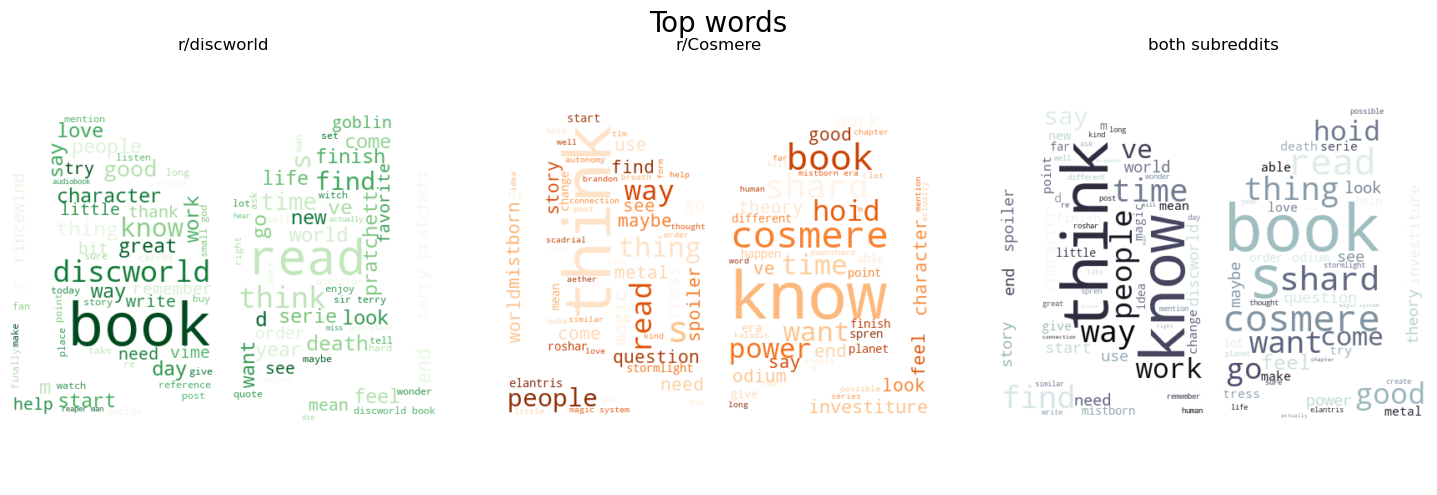

In [20]:
book_mask=np.array(Image.open('../Pictures/open-book.png'))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

g1= WordCloud(max_words=100, background_color='white', mask=book_mask,
                      colormap='Greens').generate(' '.join(posts[posts['is_discworld']==1]['title_text']))
ax1.imshow(g1, interpolation="bilinear")
ax1.set_title(f'r/discworld')
ax1.axis('off')

g2 = WordCloud(max_words=100, background_color='white', mask=book_mask,
                      colormap='Oranges').generate(' '.join(posts[posts['is_discworld']==0]['title_text']))
ax2.imshow(g2, interpolation='bilinear')
ax2.set_title(f'r/Cosmere')
ax2.axis('off')

g3 = WordCloud(max_words=100, background_color='white', mask=book_mask,
               colormap='bone').generate(' '.join(posts['title_text']))
ax3.imshow(g3, interpolation='bilinear')
ax3.set_title(f'both subreddits')
ax3.axis('off')

plt.suptitle('Top words', fontsize=20)
plt.tight_layout()

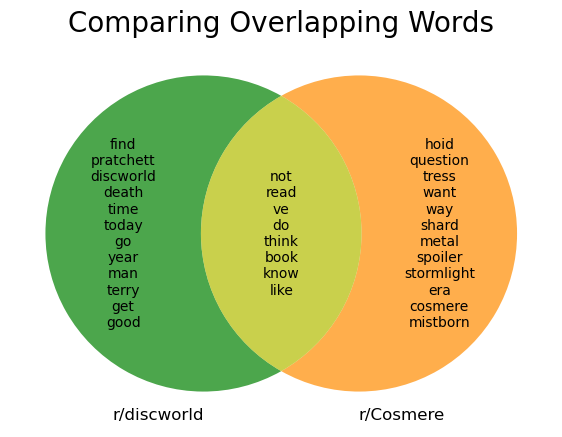

In [21]:
plt.figure(figsize=(7,7))
plt.title('Comparing Overlapping Words',fontsize=20)

set_a = set(get_top_post(input=posts[posts['is_discworld']==1]['title_text'],ngram_range=(1,1),n=20)['feature_names'])
set_b = set(get_top_post(input=posts[posts['is_discworld']==0]['title_text'],ngram_range=(1,1),n=20)['feature_names'])

venn = venn2([set_a,set_b],set_labels=['r/discworld','r/Cosmere'],set_colors=('green', 'darkorange'), alpha = 0.7)
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

In [22]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

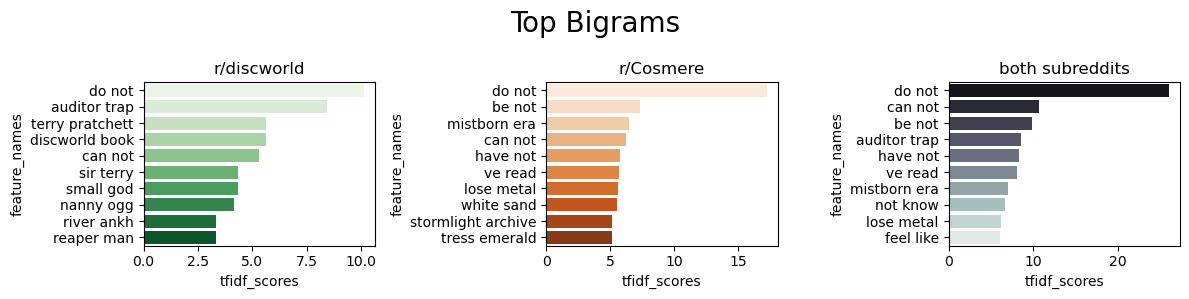

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(input=posts[posts['is_discworld']==1]['title_text'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'r/discworld')

g2=sns.barplot(data=get_top_post(input=posts[posts['is_discworld']==0]['title_text'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'r/Cosmere')

g3=sns.barplot(data=get_top_post(input=posts['title_text'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'both subreddits')

plt.suptitle('Top Bigrams', fontsize=20)
plt.tight_layout()

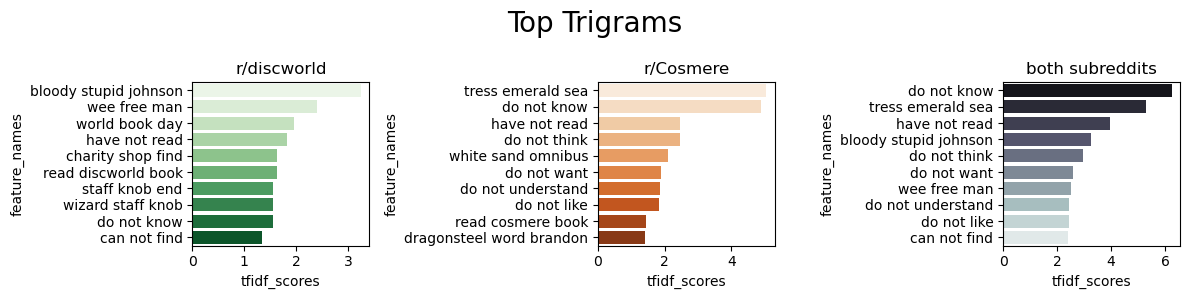

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(input=posts[posts['is_discworld']==1]['title_text'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'r/discworld')

g2=sns.barplot(data=get_top_post(input=posts[posts['is_discworld']==0]['title_text'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'r/Cosmere')

g3=sns.barplot(data=get_top_post(input=posts['title_text'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'both subreddits')

plt.suptitle('Top Trigrams', fontsize=20)
plt.tight_layout()

Ignoring words or n-grams unique to the series (e.g `blood stupid johnson`, `auditor trap`, `discworld` for r/discworld and e.g. `tress emerald sea`, `mistborn era`, `mistborn` in r/Cosmere), there are more discussion on spoilers, as well as the most recent book (`tress`, `tress emerald`, `tress emeral sea`) in r/Cosmere. r/discworld have more discussion about the author Sir Terry Pratchett. 

Common words appearing in both subs are related to reading (e.g. `book`, `read`) and Redditor's reaction (e.g. `know`, `think`, `like`), which is expected since they are both subs to discuss their respective name-sake fantasy book series universe. 

`do not know` seem to be a common and frequent topic between both subs. Looking at the posts with such phrases, it appears that these Redditors are caveating that they are not aware if the topic in their post have already been discussed on, least it gets downvoted by others.

In [25]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score of each comment
def get_sentiment_score(comment):
    sentiment_score = sia.polarity_scores(comment)
    return sentiment_score['compound']

# Apply the sentiment analysis function on the comments column
posts['sentiment_score'] = posts['title_text'].apply(get_sentiment_score)

# Define a function to categorize the sentiment score into positive, neutral, or negative
def categorize_sentiment_score(sentiment_score):
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score > -0.05 and sentiment_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the sentiment categorization function on the sentiment_score column
posts['sentiment'] = posts['sentiment_score'].apply(categorize_sentiment_score)  

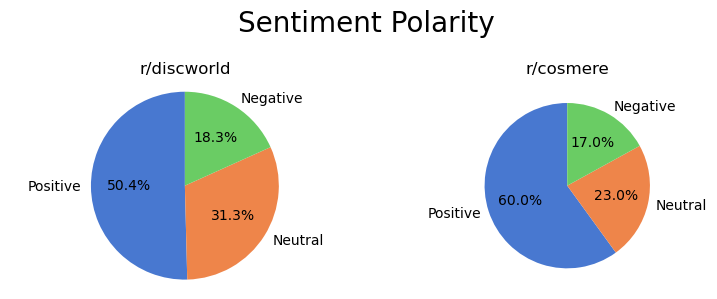

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

ax1.pie(x=posts[posts['is_discworld']==1]['sentiment'].value_counts(), labels=['Positive','Neutral','Negative'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title(f'r/discworld')

ax2.pie(x=posts[posts['is_discworld']==0]['sentiment'].value_counts(),labels=['Positive','Neutral','Negative'],
             autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
ax2.set_title(f'r/cosmere')

plt.suptitle('Sentiment Polarity', fontsize=20)
plt.tight_layout()

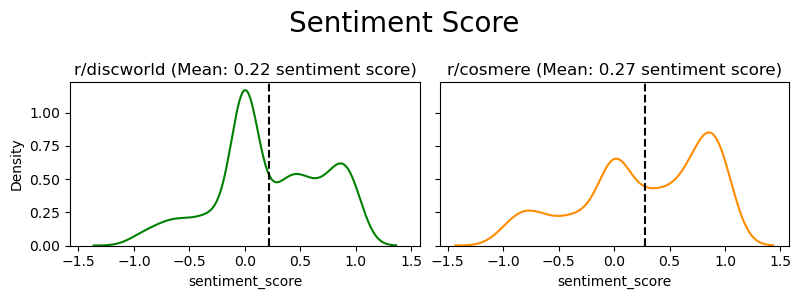

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), sharey=True, sharex=True)
ax = ax.ravel()

g1 = sns.kdeplot(data=posts[posts['is_discworld']==1], x='sentiment_score', ax = ax[0], color='green')
mean_1 = posts[posts['is_discworld']==1]['sentiment_score'].mean()
g1.set_title(f'r/discworld (Mean: {round(mean_1,2)} sentiment score)')
ax[0].axvline(mean_1, ls='--', color='black')

g2 = sns.kdeplot(data=posts[posts['is_discworld']==0], x='sentiment_score', ax = ax[1], color='darkorange')
mean_2 = posts[posts['is_discworld']==0]['sentiment_score'].mean()
g2.set_title(f'r/cosmere (Mean: {round(mean_2,2)} sentiment score)')
ax[1].axvline(mean_2, ls='--', color='black')

plt.suptitle('Sentiment Score', fontsize=20)
plt.tight_layout()

r/cosmere sentiment score skews left, with and average of 0.27 sentiment score and 60% of posts having positive sentiments. Whereas, 50% of r/discworld have positive sentiments with a lower average sentiment score of 0.22.

In [28]:
 posts.to_csv('../Data/posts_cleaned.csv', index=False) 